In [61]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [62]:
import os
import sys
import re
import pyAgrum as gum
import pyAgrum.lib.notebook as gnb
from IPython.display import display, HTML, clear_output, Image
import pandas as pd
from itertools import product
import math
from deepdiff import DeepDiff

In [63]:
# Styling notebook
def css_styling():
    styles = open("./styles/custom.css", "r").read()
    return HTML("<style>" + styles + "</style")

css_styling()

In [64]:
sys.path.insert(1, "/workspaces/ou-af/problem2/")

In [65]:
# import de code
import src.oopnclasses as oopnclasses
import src.oopnbuilder as oopnbuilder
import src.diagrambuilder as diagrambuilder
import src.testobservereplace as testchangeinput
import src.testchangeinput as testobservereplace
import specs.components as componentspecs
import specs.connections as connectionspecs
import specs.assemblies as assemblyspecs
import specs.tests as testspecs

In [66]:
def visualizeStructure(diagram):
#    display(HTML("<style>.container { width:100% !important; }</style>"))

    # print summary of nodes
    print(diagram)

    # view structure
    gnb.showInfluenceDiagram(diagram, size=60)
    
def createUtilityRow(nodelist):
    row_elements = [diagram.utility(node) for node in nodelist]
    gnb.flow.row(*row_elements)

def createCptRow(nodelist):
    row_elements = [diagram.cpt(node) for node in nodelist]
    gnb.flow.row(*row_elements)

def showCPTs(diagram):
    nodes = diagram.nodes()
    for n in nodes:
        if(diagram.isChanceNode(n)):
            gnb.flow.row(diagram.cpt(n))
            
def getDiagramChanceNodeIdsForComponent(componentname, diagram):
    idlist = []
    diagramNames = diagram.names()
    for dname in diagramNames:
        if(re.search(componentname + "$", dname)):
            nodeid = diagram.idFromName(dname)
            if (diagram.isChanceNode(nodeid)):
                idlist.append(nodeid)
    return idlist
    

def printCptTables(diagram, system):
    for component in system.getComponents():
        print("CPT tables for component: " + component.getName())
        createCptRow(getDiagramChanceNodeIdsForComponent(component.getName(), diagram))
        
def getDiagramUtilityNodeIdsForComponent(componentname, diagram):
    idlist = []
    diagramNames = diagram.names()
    for dname in diagramNames:
        if(re.search(componentname + "$", dname)):
            nodeid = diagram.idFromName(dname)
            if (diagram.isUtilityNode(nodeid)):
                idlist.append(nodeid)
    return idlist
    

def printUtilityTables(diagram, system):
    for component in system.getComponents():
        print("Utility tables for component: " + component.getName())
        createUtilityRow(getDiagramUtilityNodeIdsForComponent(component.getName(), diagram))

In [172]:
# gather specs for a system
# system = light + replacedecision + test
components = [componentspecs.light, componentspecs.switch]
connections = [connectionspecs.wire, connectionspecs.wire2]
tests = [testspecs.observeorreplacetest, testspecs.changeinputtest]
assembly = {
    "components"  : components,
    "connections" : connections,
    "structure"   : assemblyspecs.structure3,   #light, switch, wire
    "tests"       : tests,
    "testmapping" : testspecs.testmapping11
}

In [173]:
oopn = oopnbuilder.OopnBuilder(assembly).getOopn()


star building system: structure3
number of components: 6
number of connections: 5
number of tests: 1


In [174]:
connections = oopn.getConnections()

In [176]:
connlist = []
for c in connections:
    connlist.append(c.getConnectionNodes())
    
connlist

[('PresentPowerOutputsSwitch', 'PresentPowerInputsLight'),
 ('PresentLightOutputsLight', 'PresentPowerInputsSwitch1'),
 ('PresentPowerOutputsSwitch1', 'PresentPowerInputsLight1'),
 ('PresentLightOutputsLight1', 'PresentPowerInputsSwitch2'),
 ('PresentPowerOutputsSwitch2', 'PresentPowerInputsLight2')]

In [152]:
# create diagram object
diagram = gum.InfluenceDiagram()

In [153]:
diagram = diagrambuilder.diagramBuilder(diagram, oopn)

adding component: Light
adding component: Switch
adding connection between: PresentPowerOutputsSwitch and: PresentPowerInputsLight
adding cpt for component: Light
adding cpt for component: Switch
adding cpt for connection: Wire
adding test: ChangeInputTest
adding node: DecisionChangeInputTestLight
adding node: UtilityChangeInputTestLight
add edge from: DecisionChangeInputTestLight to: UtilityChangeInputTestLight
add edge from: PresentLightOutputsLight to: UtilityChangeInputTestLight
adding utility to: UtilityChangeInputTestLight
potential not identical:UtilityChangeInputTestLight
diagram: ('UtilityChangeInputTestLight', 'DecisionChangeInputTestLight', 'PresentLightOutputsLight') oopn: ('UtilityChangeInputTestLight', 'DecisionChangeInputTestLight')


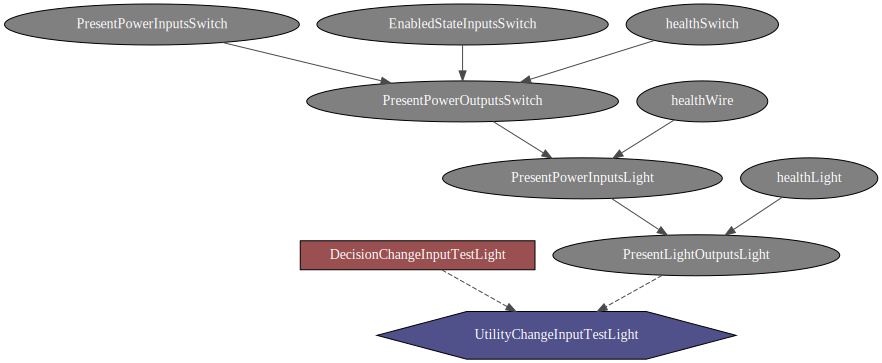

In [154]:
gnb.showInfluenceDiagram(diagram, size=60)

In [20]:
# outputtest
testutility = diagram.addUtilityNode(gum.LabelizedVariable("outputTest", "outputTest", 1))
testdecision = diagram.addDecisionNode(gum.LabelizedVariable("testdecision", "testdecisionl", ["yes", "no"]))
testoutcome = diagram.addChanceNode(gum.LabelizedVariable("testoutcome", "testoutcome", ["ok", "problem", "notdone"]))
diagram.addArc(diagram.idFromName("PresentLightOutputsLight"), testutility)
diagram.addArc(testdecision, testutility)
diagram.addArc(testdecision, testoutcome)
diagram.addArc(diagram.idFromName("healthWire"), testoutcome)
diagram.addArc(diagram.idFromName("healthSwitch"), testoutcome)
diagram.addArc(diagram.idFromName("healthLight"), testoutcome)

In [22]:
printCptTables(diagram, oopn)

CPT tables for component: Light


CPT tables for component: Switch


In [23]:
printUtilityTables(diagram, oopn)

Utility tables for component: Light


Utility tables for component: Switch


In [143]:
evs = {
'PresentLightOutputsLight':1,
#'testoutcome':0

#'PresentPowerInputsLight':1,

#'PresentPowerOutputsSwitch':0,
#'PresentPowerInputsSwitch':1,
#'EnabledStateInputsSwitch':0,

# 'DecisionReplaceLight':,
# 'DecisionReplaceSwitch':,
# 'DecisionTestObserveHealthLight':,
# 'DecisionTestObserveHealthSwitch':,

# 'TestOutcomeTestObserveHealthLight':,
# 'TestOutcomeTestObserveHealthSwitch':,
# 'UtilityReplaceLight':,
# 'UtilityReplaceSwitch':,
# 'UtilityTestObserveHealthLight':,
# 'UtilityTestObserveHealthSwitch':,
# 'healthLight':,
# 'healthSwitch':,
# 'healthWire':
}


In [144]:
ie = gum.ShaferShenoyLIMIDInference(diagram) 
ie.setEvidence(evs)
#ie.addNoForgettingAssumption(["DecisionTestObserveHealthSwitch","DecisionReplaceSwitch", "DecisionTestObserveHealthLight", "DecisionReplaceLight"])
gnb.sideBySide(gnb.getInference(diagram,engine=ie, evs=evs, size=200))

In [26]:
diagram.utility("outputTest")[{"testdecision":"yes", "PresentLightOutputsLight":"no"}] = 4
diagram.utility("outputTest")[{"testdecision":"no", "PresentLightOutputsLight":"no"}] = 3
diagram.utility("outputTest")[{"testdecision":"yes", "PresentLightOutputsLight":"yes"}] = 2
diagram.utility("outputTest")[{"testdecision":"no", "PresentLightOutputsLight":"yes"}] = 1
diagram.utility("outputTest")

(pyAgrum.Potential<double>@0x22503660) 
             ||  outputT|
Presen|testde||0        |
------|------||---------|
yes   |yes   || 2.0000  |
no    |yes   || 4.0000  |
yes   |no    || 1.0000  |
no    |no    || 3.0000  |

In [27]:
diagram.cpt(diagram.idFromName("testoutcome"))[{"healthLight":"ok", "healthSwitch":"ok", "healthWire":"ok","testdecision":"yes" }] = [0.98, 0.01, 0.01]
diagram.cpt(diagram.idFromName("testoutcome"))[{"healthLight":"ok", "healthSwitch":"ok", "healthWire":"ok","testdecision":"no" }] = [0.01, 0.01, 0.98]
diagram.cpt(diagram.idFromName("testoutcome"))[{"healthLight":"ok", "healthSwitch":"ok", "healthWire":"broken","testdecision":"yes" }] = [0.01, 0.98, 0.01]
diagram.cpt(diagram.idFromName("testoutcome"))[{"healthLight":"ok", "healthSwitch":"ok", "healthWire":"broken","testdecision":"no" }] = [0.01, 0.01, 0.98]

diagram.cpt(diagram.idFromName("testoutcome"))[{"healthLight":"ok", "healthSwitch":"broken", "healthWire":"ok","testdecision":"yes" }] = [0.01, 0.98, 0.01]
diagram.cpt(diagram.idFromName("testoutcome"))[{"healthLight":"ok", "healthSwitch":"broken", "healthWire":"ok","testdecision":"no" }] = [0.01, 0.01, 0.98]
diagram.cpt(diagram.idFromName("testoutcome"))[{"healthLight":"ok", "healthSwitch":"broken", "healthWire":"broken","testdecision":"yes" }] = [0.01, 0.98, 0.01]
diagram.cpt(diagram.idFromName("testoutcome"))[{"healthLight":"ok", "healthSwitch":"broken", "healthWire":"broken","testdecision":"no" }] = [0.01, 0.01, 0.98]

diagram.cpt(diagram.idFromName("testoutcome"))[{"healthLight":"broken", "healthSwitch":"ok", "healthWire":"ok","testdecision":"yes" }] = [0.01, 0.98, 0.01]
diagram.cpt(diagram.idFromName("testoutcome"))[{"healthLight":"broken", "healthSwitch":"ok", "healthWire":"ok","testdecision":"no" }] = [0.01, 0.01, 0.98]
diagram.cpt(diagram.idFromName("testoutcome"))[{"healthLight":"broken", "healthSwitch":"ok", "healthWire":"broken","testdecision":"yes" }] = [0.01, 0.98, 0.01]
diagram.cpt(diagram.idFromName("testoutcome"))[{"healthLight":"broken", "healthSwitch":"ok", "healthWire":"broken","testdecision":"no" }] = [0.01, 0.01, 0.98]

diagram.cpt(diagram.idFromName("testoutcome"))[{"healthLight":"broken", "healthSwitch":"broken", "healthWire":"ok","testdecision":"yes" }] = [0.01, 0.98, 0.01]
diagram.cpt(diagram.idFromName("testoutcome"))[{"healthLight":"broken", "healthSwitch":"broken", "healthWire":"ok","testdecision":"no" }] = [0.01, 0.01, 0.98]
diagram.cpt(diagram.idFromName("testoutcome"))[{"healthLight":"broken", "healthSwitch":"broken", "healthWire":"broken","testdecision":"yes" }] = [0.01, 0.98, 0.01]
diagram.cpt(diagram.idFromName("testoutcome"))[{"healthLight":"broken", "healthSwitch":"broken", "healthWire":"broken","testdecision":"no" }] = [0.01, 0.01, 0.98]


In [28]:
diagram.cpt(diagram.idFromName("testoutcome"))

(pyAgrum.Potential<double>@0x2266aed0) 
                           ||  testoutcome                |
testde|health|health|health||ok       |problem  |notdone  |
------|------|------|------||---------|---------|---------|
yes   |ok    |ok    |ok    || 0.9800  | 0.0100  | 0.0100  |
no    |ok    |ok    |ok    || 0.0100  | 0.0100  | 0.9800  |
yes   |broken|ok    |ok    || 0.0100  | 0.9800  | 0.0100  |
no    |broken|ok    |ok    || 0.0100  | 0.0100  | 0.9800  |
yes   |ok    |broken|ok    || 0.0100  | 0.9800  | 0.0100  |
no    |ok    |broken|ok    || 0.0100  | 0.0100  | 0.9800  |
[...4 more line(s) ...]
yes   |broken|ok    |broken|| 0.0100  | 0.9800  | 0.0100  |
no    |broken|ok    |broken|| 0.0100  | 0.0100  | 0.9800  |
yes   |ok    |broken|broken|| 0.0100  | 0.9800  | 0.0100  |
no    |ok    |broken|broken|| 0.0100  | 0.0100  | 0.9800  |
yes   |broken|broken|broken|| 0.0100  | 0.9800  | 0.0100  |
no    |broken|broken|broken|| 0.0100  | 0.0100  | 0.9800  |

In [29]:
diagram.cpt.posterior("outputTest")

AttributeError: 'function' object has no attribute 'posterior'

In [30]:
ie.posteriorUtility("UtilityReplaceWire")

NotFound: [pyAgrum] Object not found: No element with the key <UtilityReplaceWire>

In [31]:
a = -5*.0087 + -2*.0013
b = 0 + -4* .1238
print(a+b)

-0.5413


In [ ]:
gnb.showInfluenceDiagram(diagram, size=60)

In [177]:
from collections import defaultdict, deque

# Class to represent a graph using adjacency list


class Graph:
    def __init__(self):
        self.adjList = defaultdict(list)

    # Function to add an edge to the graph
    def addEdge(self, u, v):
        self.adjList[u].append(v)

    # Function to perform Breadth First Search on a graph represented using adjacency list
    def bfs(self, startNode):
        # Create a queue for BFS
        queue = deque()
        visited = [False] * (max(self.adjList.keys()) + 1)

        # Mark the current node as visited and enqueue it
        visited[startNode] = True
        queue.append(startNode)

        # Iterate over the queue
        while queue:
            # Dequeue a vertex from queue and print it
            currentNode = queue.popleft()
            print(currentNode, end=" ")

            # Get all adjacent vertices of the dequeued vertex currentNode
            # If an adjacent has not been visited, then mark it visited and enqueue it
            for neighbor in self.adjList[currentNode]:
                if not visited[neighbor]:
                    visited[neighbor] = True
                    queue.append(neighbor)


# Create a graph
graph = Graph()

# Add edges to the graph
graph.addEdge(0, 1)
graph.addEdge(0, 2)
graph.addEdge(1, 3)
graph.addEdge(1, 4)
graph.addEdge(2, 4)

# Perform BFS traversal starting from vertex 0
print("Breadth First Traversal starting from vertex 0:", end=" ")
graph.bfs(0)


Breadth First Traversal starting from vertex 0: 0 1 

IndexError: list index out of range

In [181]:
import networkx as nx

G = nx.DiGraph()
G.add_nodes_from(range(100, 105))
G.add_edges_from([(100, 101), (100, 103)])

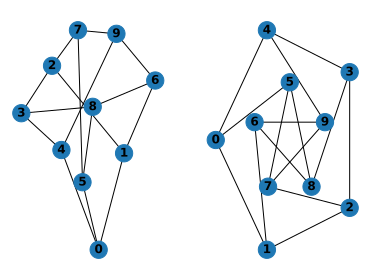

In [182]:
import matplotlib.pyplot as plt
G = nx.petersen_graph()
subax1 = plt.subplot(121)
nx.draw(G, with_labels=True, font_weight='bold')
subax2 = plt.subplot(122)
nx.draw_shell(G, nlist=[range(5, 10), range(5)], with_labels=True, font_weight='bold')